In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import os
import matplotlib.pyplot as plt


In [3]:
%cd

C:\Users\shash


C:\Users\shash\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
C:\Users\shash\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:428: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os

current_directory = os.getcwd()
print("Current directory:", current_directory)




Current directory: e:\Haegl\Haegl ML Projects\Braille


In [3]:
# Define paths
data_dir = "dataset"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Define transforms for data augmentation and normalization
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


print(data_dir)


dataset


In [4]:
# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the ResNet-152 model
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5) 

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.8)


c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 1.4725, Test Loss: 1.3460, Train Acc: 36.50%, Test Acc: 37.93%
Epoch [2/10], Train Loss: 1.1383, Test Loss: 1.0250, Train Acc: 63.59%, Test Acc: 75.86%
Epoch [3/10], Train Loss: 0.9636, Test Loss: 0.7910, Train Acc: 77.52%, Test Acc: 98.28%
Epoch [4/10], Train Loss: 0.8185, Test Loss: 0.6283, Train Acc: 84.87%, Test Acc: 98.28%
Epoch [5/10], Train Loss: 0.6761, Test Loss: 0.4999, Train Acc: 89.06%, Test Acc: 100.00%
Epoch [6/10], Train Loss: 0.6202, Test Loss: 0.3902, Train Acc: 89.66%, Test Acc: 100.00%
Epoch [7/10], Train Loss: 0.5520, Test Loss: 0.3164, Train Acc: 90.68%, Test Acc: 100.00%
Epoch [8/10], Train Loss: 0.5128, Test Loss: 0.2448, Train Acc: 92.05%, Test Acc: 100.00%
Epoch [9/10], Train Loss: 0.4690, Test Loss: 0.2438, Train Acc: 92.39%, Test Acc: 100.00%
Epoch [10/10], Train Loss: 0.4799, Test Loss: 0.2019, Train Acc: 92.65%, Test Acc: 100.00%


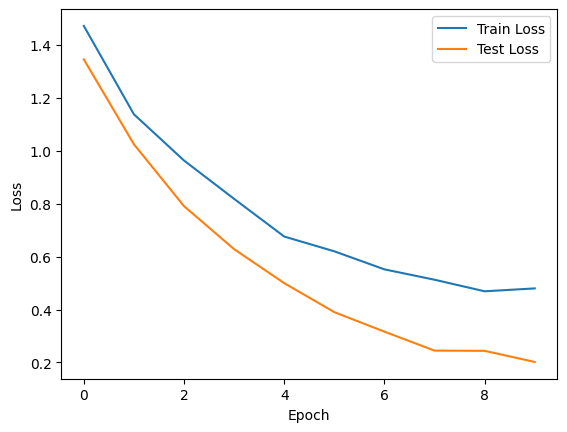

In [5]:
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    correct_train = 0
    correct_test = 0

    # Training
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()

    # Testing
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()

    # Calculate average losses
    train_loss = train_loss / len(train_loader.dataset)
    test_loss = test_loss / len(test_loader.dataset)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, '
          f'Test Loss: {test_loss:.4f}, '
          f'Train Acc: {100.0 * correct_train / len(train_loader.dataset):.2f}%, '
          f'Test Acc: {100.0 * correct_test / len(test_loader.dataset):.2f}%')

# Plot the training and testing losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
torch.save(model.state_dict(), 'best.pth')

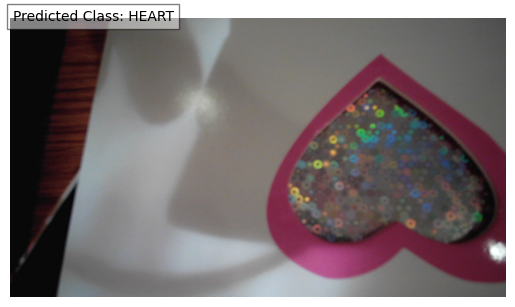

In [10]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define transforms for test image
inference_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the trained model
model = models.resnet152()
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 5)  
model.load_state_dict(torch.load('best.pth'))
model.eval()

# Define class labels
class_labels = ['CIRCLE', 'HEART', 'SQUARE', 'STAR', 'TRIANGLE'] 

# Function to predict class for an image
def predict_image_class(image_path):
    image = Image.open(image_path)
    image_tensor = inference_transforms(image).unsqueeze(0)
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        class_index = predicted.item()
        return class_labels[class_index]

# Inference on a test image
test_image_path = 'dataset/test/heart/WIN_20240307_15_31_45_Pro (2).jpg'
predicted_class = predict_image_class(test_image_path)

# Display the image with the predicted class label on top
image = Image.open(test_image_path)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted Class: {predicted_class}', bbox=dict(facecolor='white', alpha=0.5))
plt.show()
